<a href="https://colab.research.google.com/github/jszajner11/rcoderandomyes/blob/main/AI_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# Import bibliotek
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.activations import relu, sigmoid, linear
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import SGD, Adam

In [107]:
# Załadowanie danych
data = pd.read_csv('https://raw.githubusercontent.com/jszajner11/io_projekt/main/wig_d.csv?token=GHSAT0AAAAAACM7WBCBGHFU43N3YRRLPG3KZNYDPSA', sep = ',') # ładowanie danych z Github
#data = pd.read_csv('wig_d.csv', sep = ',') # ładowanie danych z pliku

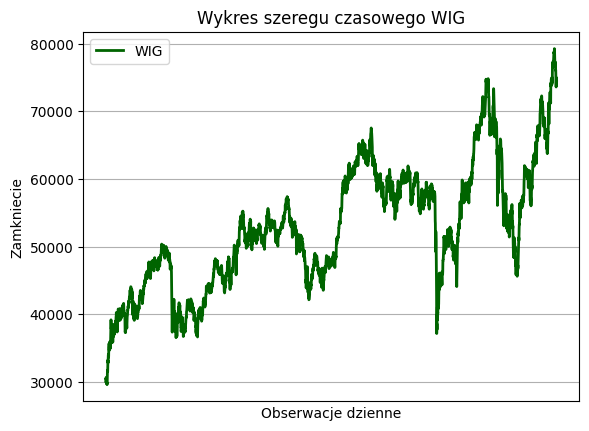

In [108]:
# Wykres szeregu czasowego
plt.plot(data['Data'], data['Zamkniecie'], linestyle='-', color='darkgreen', linewidth=2, label='WIG')
plt.title('Wykres szeregu czasowego WIG')
plt.xlabel('Obserwacje dzienne')
plt.ylabel('Zamkniecie')
plt.legend()
plt.grid(True)
plt.xticks([])
plt.show()

In [109]:
# Definiowanie nowych zmiennych i kolumn
zamk = data.iloc[:,[4]] # zamkniecie - na tych danych bedzie przeprowadzana analiza
zamk['op1'] = zamk['Zamkniecie'].shift(periods=1) # dodanie opoznienia t = 1
zamk['op5'] = zamk['Zamkniecie'].shift(periods=5) # dodanie opoznienia t = 5 (bo dane dzienne)
proba_testowa = zamk[-150:] # 150 ostatnich obserwacji posłuży jako zbiór danych testowych
proba_testowa['index'] = proba_testowa.index # dodanie indeksu
proba_uczaca = zamk.iloc[:-150] # obserwacje bez ostatnich 150 posłużą jako próba ucząca
proba_uczaca = proba_uczaca.dropna() # usuwamy braki danych
proba_uczaca1 = proba_uczaca.values # przekształcenie zbioru w array
proba_testowa1 = proba_testowa.values # przekształcenie zbioru w array

<ipython-input-109-b9de511ae3a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zamk['op1'] = zamk['Zamkniecie'].shift(periods=1) # dodanie opoznienia t = 1
<ipython-input-109-b9de511ae3a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zamk['op5'] = zamk['Zamkniecie'].shift(periods=5) # dodanie opoznienia t = 5 (bo dane dzienne)
<ipython-input-109-b9de511ae3a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0.5, 1.0, 'Wykres funkcji straty')

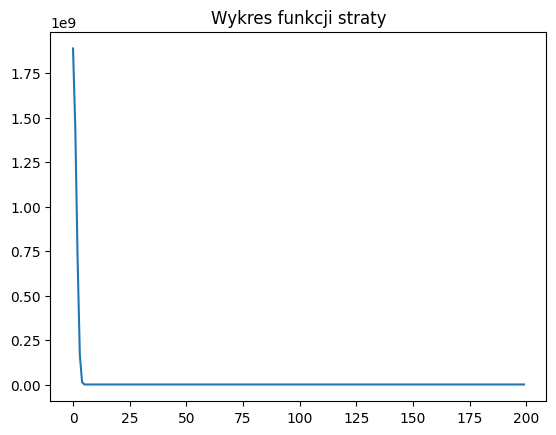

In [128]:
# Sieć
iter = 200

model = Sequential()
model.add(Dense(20,                        #liczba neuronów
                input_dim = 1,            #wymiar danych
                activation = relu))       #funkcja aktywacji
model.add(Dense(10, activation = relu))
model.add(Dense(1, activation = linear))
model.compile(loss = mean_squared_error,
              optimizer = Adam(),
              metrics = ['mse'])
history = model.fit(proba_uczaca1[:,1:2],
                         proba_uczaca1[:,0],
                         epochs = iter,
                         batch_size = 100,
                         verbose = 0)


plt.plot(range(iter), (history.history)['loss'])
plt.title('Wykres funkcji straty')

5/5 [==============================] - 0s 3ms/step


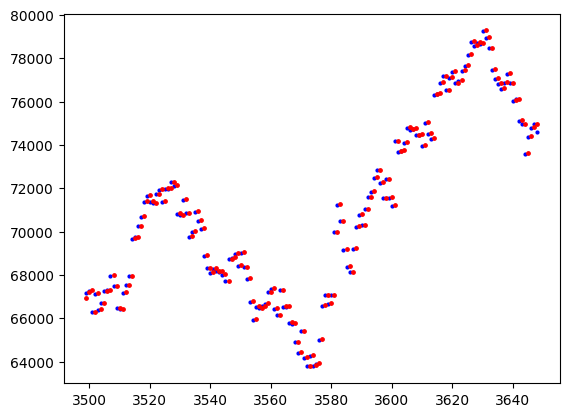

In [129]:
# Prognoza
pred = model.predict(proba_testowa1[:,1])


plt.scatter(proba_testowa1[:,3],proba_testowa1[:,0], c = 'b', s = 4)
plt.scatter(proba_testowa1[:,3], pred.reshape(150), c = 'r', s = 6)

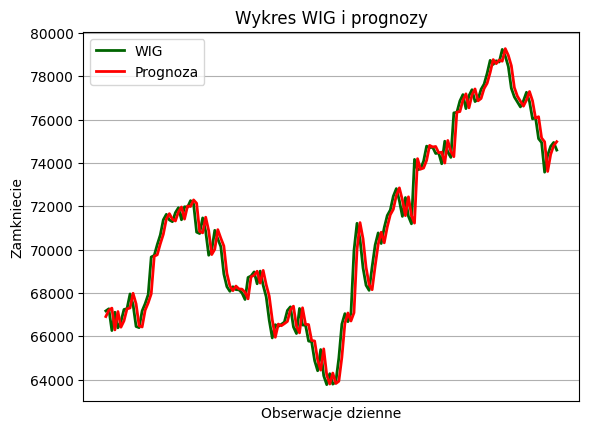

In [130]:
# Wykres WIG i prognozy
plt.plot(proba_testowa1[:,3], proba_testowa1[:,0], linestyle='-', color='darkgreen', linewidth=2, label='WIG')
plt.plot(proba_testowa1[:,3], pred, linestyle='-', color='red', linewidth=2, label='Prognoza')
plt.title('Wykres WIG i prognozy')
plt.xlabel('Obserwacje dzienne')
plt.ylabel('Zamkniecie')
plt.legend()
plt.grid(True)
plt.xticks([])
plt.show()

In [137]:
# Ocena dokładności prognozy
observed = proba_testowa1[:, 0]
predicted = pred

mse = np.mean((observed - predicted) ** 2)
mae = np.mean(np.abs(observed - predicted))
mape = np.mean(np.abs((observed - predicted) / observed)) * 100
rmse = np.sqrt(np.mean((observed - predicted) ** 2))
V = rmse / (np.mean(observed)) * 100

wynik = pd.Series({'MSE': mse, 'MAE': mae, 'MAPE': mape, 'RMSE': rmse, 'V': V})
wynik
# Miary oceny prognozy ex post, a konkretniej błędy prognozy (MAPE, V) wypadły powyżej 5%, co zazwyczaj świadczy o niedopuszczalności prognozy.
# Najprawdopodobniej należało by nauczyć model na podstawie innych danych, innych opóźnień

MSE     3.424349e+07
MAE     4.734661e+03
MAPE    6.656982e+00
RMSE    5.851794e+03
V       8.238683e+00
dtype: float64